In [1]:
 # Подгрузим пакеты 
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt  #Пакет для построения графиков и прочего
import seaborn as sns

<p style="align: center;"><img align=center src="https://netology.ru/backend/tilda/images/tild3439-3364-4535-b334-656263633534__main.svg"  width=900></p>
<h3 style="text-align: center;"><b>«Статистическая проверка гипотез для связанных выборок. A/B тесты и как их проводить»</b></h3>


# Задания для самостоятельного решения

**Замечание: 1** Предполагается, что для решения заданий  № 1-3 будут использоваться разные тесты.

**Замечание: 2** Для зачета уже достаточно половины абсолютно верно решенных заданий. 

Если возникают сложности по ходу решения - пиште свой вопрос в общий чат в Slack. Там всегда подскажут) 




<div class="alert alert-info">
<b>Задание № 1 (Обязательно)</b>
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.
    
</div>

In [18]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

stat, p = stats.wilcoxon(A, B)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=1930.000, p=0.041
Разные распределения (отвергаем H0)


(array([ 5.,  7., 13., 13., 21., 16., 11.,  8.,  3.,  3.]),
 array([-99.92486747, -73.18817253, -46.45147758, -19.71478263,
          7.02191231,  33.75860726,  60.4953022 ,  87.23199715,
        113.9686921 , 140.70538704, 167.44208199]),
 <BarContainer object of 10 artists>)

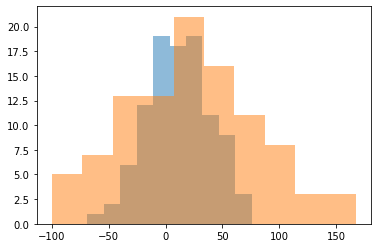

In [25]:
plt.hist(A,alpha=0.5)
plt.hist(B,alpha=0.5)

In [36]:
data_group2 = pd.DataFrame()
data_group2['value'] = np.append(A, B) 
data_group2



,value
0,63.483642
1,2.417810
2,-3.536954
3,-68.599557
4,10.751461
...,...
195,27.703331
196,26.636666
197,66.925797
198,46.579689


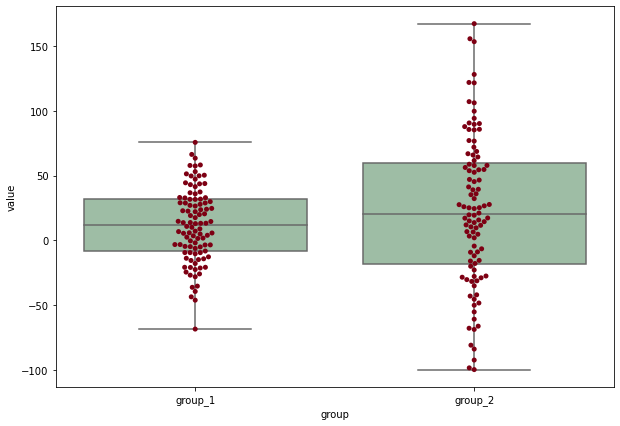

In [70]:
data_group = pd.DataFrame()
data_group['value'] = np.append(A, B)
data_group['group'] = ['group_1']*len(A)+['group_2']*len(B)

plt.figure(figsize=(10, 7))
ax = sns.boxplot(x='group', y='value', data=data_group, color='#99c2a2')
ax = sns.swarmplot(x="group", y="value", data=data_group, color='#7d0013')
plt.show()

<div class="alert alert-info">
<b>Задание № 2 (Обязательно)</b>
Вам даны результаты проверки двух препаратов. 
    
Требуется: 
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`А` - группа людей без препарата.

`B` - та же группа людей, но получающая препарат
</div>

In [39]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

# Ваш код.

<AxesSubplot:ylabel='Density'>

<Figure size 1080x720 with 0 Axes>

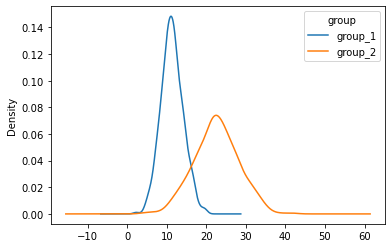

In [76]:
# Creating an list with bootstrapped means for each AB-group
plt.figure(figsize=(15, 10))

boot_1d = []
for i in range(1000):
    boot_mean = data_group.sample(frac = 1, replace = True).groupby('group')['value'].mean()  #retention_1
    boot_1d.append(boot_mean)
    
    
    
# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

In [85]:
# С помощью bootstrap выборки приведены к нормальному виду и возможно использование теста Стьюдента
t, p_value = stats.ttest_ind(boot_1d['group_1'], boot_1d['group_2'])
print(f't:{t}, p:{p_value}')


# Интерпретируем
alpha = 0.05   # Уровень значимости
if p_value > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

t:-56.389220404774996, p:0.0
Разные распределения (отвергаем H0)


<div class="alert alert-info">
<b>Задание № 3 (Обязательно)</b>
Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
`water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]`

`nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]`

`mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]`
</div>

In [26]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

# Ваш код.

In [27]:
F, p = stats.f_oneway(water, nutri, mineral)  # дисперсионный анализ (ДА) в python

alpha = 0.05  # Уровень значимости
print(F, p)   # Смотрим на результаты ДА

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

12.525963044834192 2.9240047906326866e-05
Разное распределение (отклоняем H0)


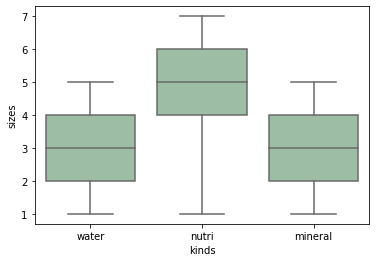

In [28]:
sizes = water + nutri + mineral
kinds = ['water']*len(water) + ['nutri']*len(nutri)+['mineral']*len(mineral)
df_mid = pd.DataFrame()
df_mid['sizes'] = sizes
df_mid['kinds'] = kinds


ax = sns.boxplot(x='kinds', y='sizes', data=df_mid, color='#99c2a2')
#ax = sns.swarmplot(x="kinds", y="sizes", data=df_mid, color='#7d0013')
plt.show()

# Покемоны и AB-тестирование 
(реальный кейс собеседования на позицию Аналитика).


# Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

## Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [90]:
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)  # Откроем датасет
pokemon.head()

 
#Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается,
#что они имеют одинаковую значимость.

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


# Задачи

<div class="alert alert-info">
<b>Задание № 1 (Обязательно):</b>
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>


In [122]:
pokemon_att = pokemon.loc[(pokemon['Class 1'].isin(['Grass','Rock'])) & (pokemon['Class 2'].isnull())]
pokemon_att.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
122,123,Tangela,Grass,NaN,65,55,115,100,40,60,False
166,167,Chikorita,Grass,NaN,45,49,65,49,65,45,False
167,168,Bayleef,Grass,NaN,60,62,80,63,80,60,False
168,169,Meganium,Grass,NaN,80,82,100,83,100,80,False
197,198,Bellossom,Grass,NaN,75,80,95,90,100,50,False


In [124]:
# Так как выборки несбалансированные, используем Критерием Манна-Уитни
A=pokemon_att['Attack'].loc[pokemon['Class 1']=='Grass']
B=pokemon_att['Attack'].loc[pokemon['Class 1']=='Rock']
t, p_value = stats.mannwhitneyu(A,B)
print(f't:{t}, p:{p_value}')

# Интерпретируем
alpha = 0.05   # Уровень значимости
if p_value > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

t:59.5, p:0.0032783739536316713
Разные распределения (отвергаем H0)


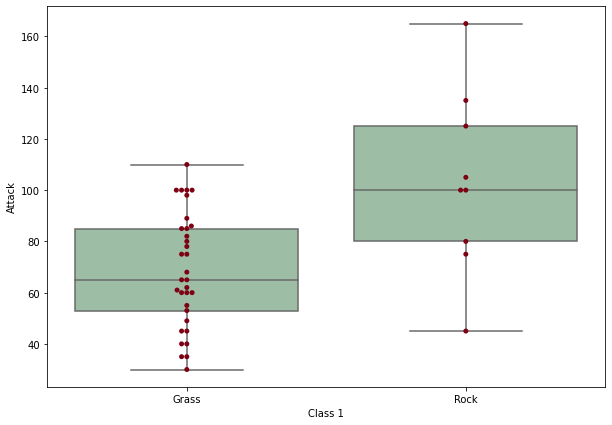

In [113]:
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x='Class 1', y='Attack', data=pokemon_att, color='#99c2a2')
ax = sns.swarmplot(x="Class 1", y="Attack", data=pokemon_att, color='#7d0013')
plt.show()

<div class="alert alert-info">
<b>Задание № 2 (Обязательно):</b>
    
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`. 
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [118]:
pokemon_spd = pokemon.loc[(pokemon['Class 1'].isin(['Water','Normal'])) & (pokemon['Class 2'].isnull())]
pokemon_spd.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,False
10,11,Wartortle,Water,NaN,59,63,80,65,80,58,False
11,12,Blastoise,Water,NaN,79,83,100,85,105,78,False
12,13,Mega Blastoise,Water,NaN,79,103,120,135,115,78,False
24,25,Rattata,Normal,NaN,30,56,35,25,35,72,False


In [125]:
A=pokemon_spd['Speed'].loc[pokemon['Class 1']=='Water']
B=pokemon_spd['Speed'].loc[pokemon['Class 1']=='Normal']
t, p_value = stats.ttest_ind(A,B)
print(f't:{t}, p:{p_value}')

# Интерпретируем
alpha = 0.05   # Уровень значимости
if p_value > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

t:-0.3529077969681485, p:0.7247871854890613
Одинаковые распределения (не отвергаем H0)


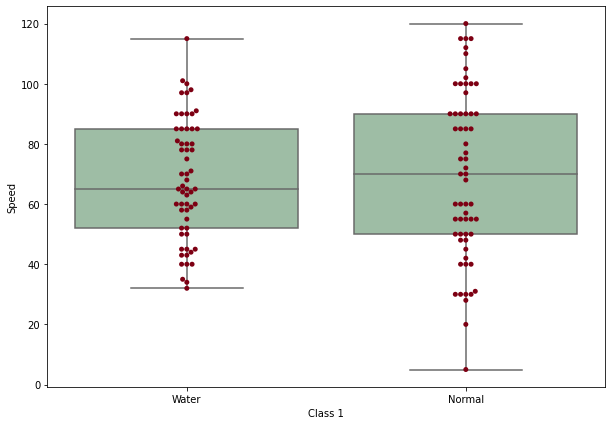

In [126]:
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x='Class 1', y='Speed', data=pokemon_spd, color='#99c2a2')
ax = sns.swarmplot(x="Class 1", y="Speed", data=pokemon_spd, color='#7d0013')
plt.show()

<div class="alert alert-info">
<b>Задание № 3:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

<div class="alert alert-info">
<b>Задание № 4:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [28]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']

<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

<div class="alert alert-info">
<b>Задание № 6:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь! 
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [29]:
best_defence_class = ['Rock', 'Ground','Steel','Ice']
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']